In [32]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
img = cv2.imread('./Family_Photos/IMG_0802.png')
img.shape

(937, 750, 3)

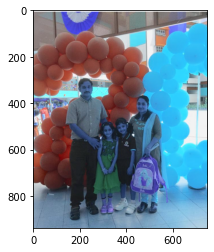

In [34]:
plt.imshow(img)

In [35]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(937, 750)

In [36]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [166, 166, 166, ..., 207, 207, 207],
       [166, 166, 166, ..., 208, 208, 208],
       [166, 166, 166, ..., 209, 209, 209]], dtype=uint8)

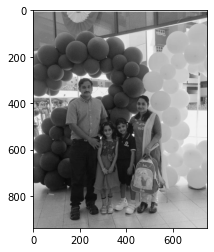

In [37]:
plt.imshow(gray, cmap='gray')

In [38]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[200, 309,  60,  60],
       [293, 496,  54,  54],
       [433, 381,  61,  61]], dtype=int32)

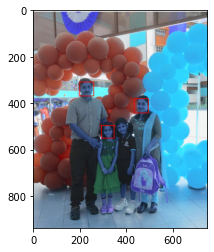

In [39]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

(x,y,w,h) = faces[1]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

(x,y,w,h) = faces[2]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

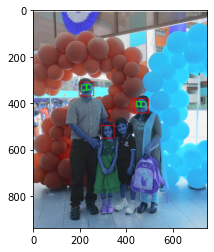

In [40]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

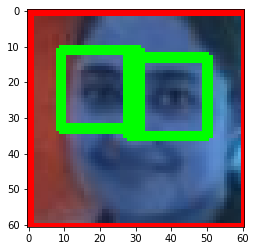

In [41]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [46]:
roi_color.shape

(61, 61, 3)

In [47]:
cropped_img = np.array(roi_color)
cropped_img.shape

(61, 61, 3)

In [54]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    cropped_images = []
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            #print(roi_color)
            #return roi_color
            cropped_images.append(roi_color)
    return cropped_images

In [55]:
cropped_images = get_cropped_image_if_2_eyes('./Family_Photos/IMG_0802.png')
len(cropped_images)

2

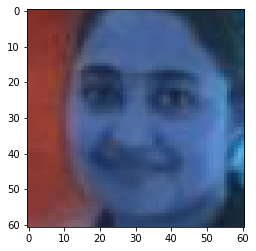

In [59]:
plt.imshow(cropped_images[1])

In [22]:
path_to_data = "./Family_Photos/"
path_to_cropped_data = "./Family_Faces/"

In [25]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
img_dirs

[]

In [27]:
import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [ ]:
#cropped_image_dirs = []
#img_dir = path_to_data

#family_member_file_names_dict = {}
#
#family_members = ["Ajith" , "Dayana", "Angelin", "Carolin"]
#family_members_file_names_dict[celebrity_name] = []


In [61]:
count = 1
for entry in os.scandir(path_to_data):
    roi_color_list = get_cropped_image_if_2_eyes(entry.path)
    if roi_color_list is not None:
        for roi_color in roi_color_list:
            cropped_folder = path_to_cropped_data
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = "face_" + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)        
            count += 1

In [62]:
cropped_image_dirs = []
cropped_image_dirs.append("./Family_Faces_Dataset/Ajith")
cropped_image_dirs.append("./Family_Faces_Dataset/Angelin")
cropped_image_dirs.append("./Family_Faces_Dataset/Carolin")
cropped_image_dirs.append("./Family_Faces_Dataset/Dayana")
cropped_image_dirs

['./Family_Faces_Dataset/Ajith',
 './Family_Faces_Dataset/Angelin',
 './Family_Faces_Dataset/Carolin',
 './Family_Faces_Dataset/Dayana']

In [63]:
family_member_file_names_dict = {}
for img_dir in cropped_image_dirs:
    family_member_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    family_member_file_names_dict[family_member_name] = file_list
family_member_file_names_dict

{'Ajith': ['./Family_Faces_Dataset/Ajith\\face_138.png',
  './Family_Faces_Dataset/Ajith\\face_153.png',
  './Family_Faces_Dataset/Ajith\\face_156.png',
  './Family_Faces_Dataset/Ajith\\face_163.png',
  './Family_Faces_Dataset/Ajith\\face_180.png',
  './Family_Faces_Dataset/Ajith\\face_183.png',
  './Family_Faces_Dataset/Ajith\\face_201.png',
  './Family_Faces_Dataset/Ajith\\face_216.png',
  './Family_Faces_Dataset/Ajith\\face_22.png',
  './Family_Faces_Dataset/Ajith\\face_221.png',
  './Family_Faces_Dataset/Ajith\\face_24.png',
  './Family_Faces_Dataset/Ajith\\face_253.png',
  './Family_Faces_Dataset/Ajith\\face_257.png',
  './Family_Faces_Dataset/Ajith\\face_259.png',
  './Family_Faces_Dataset/Ajith\\face_262.png',
  './Family_Faces_Dataset/Ajith\\face_32.png',
  './Family_Faces_Dataset/Ajith\\face_39.png',
  './Family_Faces_Dataset/Ajith\\face_43.png',
  './Family_Faces_Dataset/Ajith\\face_52.png',
  './Family_Faces_Dataset/Ajith\\face_63.png',
  './Family_Faces_Dataset/Ajith\\face_

In [64]:
class_dict = {}
count = 0
for family_member_name in family_member_file_names_dict.keys():
    class_dict[family_member_name] = count
    count = count + 1
class_dict

{'Ajith': 0, 'Angelin': 1, 'Carolin': 2, 'Dayana': 3}

In [65]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

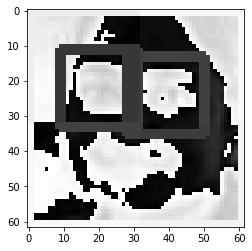

In [79]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [83]:
X, y = [], []
for family_member_name, training_files in family_member_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[family_member_name])   

In [85]:
len(X[0])

4096

In [90]:
len(X)

223

In [91]:
X[0].shape

(4096,)

In [92]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(223, 4096)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [94]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6295570358914484

In [113]:
X_train[0]

array([ 26.,  26.,  26., ..., 254., 255.,   1.])

In [98]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7142857142857143

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

In [101]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [102]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [104]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.862567,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.629055,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.832442,{'logisticregression__C': 1}


In [106]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [107]:
best_estimators['svm'].score(X_test,y_test)

0.7678571428571429

In [108]:
best_estimators['random_forest'].score(X_test,y_test)

0.48214285714285715

In [109]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8035714285714286

In [110]:
best_clf = best_estimators['svm']

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  1,  0,  0],
       [ 0,  9,  3,  1],
       [ 1,  3, 20,  1],
       [ 0,  1,  2,  8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

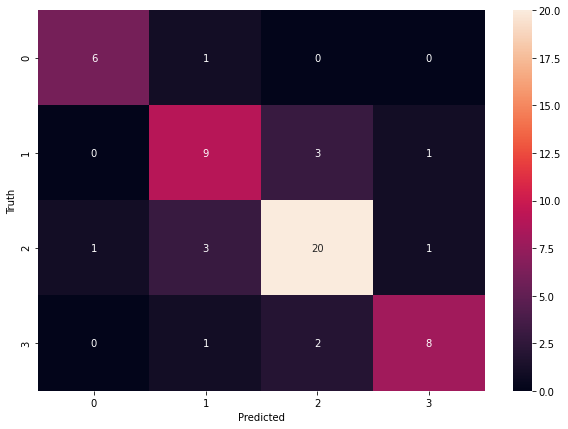

In [112]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [114]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


['saved_model.pkl']

In [116]:
class_dict

{'Ajith': 0, 'Angelin': 1, 'Carolin': 2, 'Dayana': 3}

In [115]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))